In [1]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '83274eb2-bf95-460f-8db1-6f15aac1d0c1',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '83274eb2-bf95-460f-8db1-6f15aac1d0c1',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

    # Alternatively Create a CSV file and append the data to that
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\aerei\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\aerei\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\aerei\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Read in the file: df = pd.read_csv(r'C:\Users\aerei\OneDrive\Documents\Python Scripts\API.csv')
 

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) #sleeps for 1 minute
exit()

In [ ]:
df

In [ ]:
#Change the scientific notation to make it easier to read the numbers

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df

In [ ]:
# Looking at the coin trends over time

df_trends = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df_trends

In [ ]:
df_stacked = df_trends.stack()
df_stacked

In [ ]:
type(df_stacked)

In [ ]:
df_stacked2 = df_stacked.to_frame(name='values')
df_stacked2

In [ ]:
df_stacked2.count()

In [ ]:
index = pd.Index(range(90))

df_stacked3 = df_stacked2.reset_index()
df_stacked3

In [ ]:
df_stacked4 = df_stacked3.rename(columns={'level_1': 'percent_change'})
df_stacked4

In [ ]:
df_stacked4['percent_change'] = df_stacked4['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr','24h','7d','30d','60d','90d'])
df_stacked4

In [25]:
import seaborn as sns
import matplotlib as plt

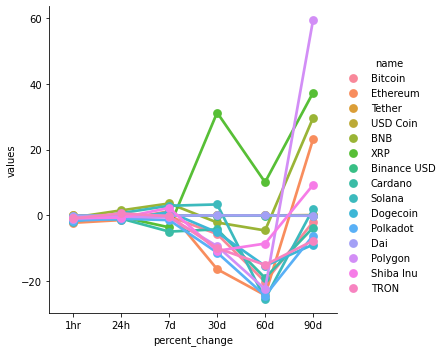

In [26]:
sns.catplot(x='percent_change', y='values', hue='name', data=df_stacked4, kind='point')